#### Creating File DataFrame

- 데이터 출처
    - https://open.selectstar.ai/ko/?page_id=5976
    - https://aihub.or.kr/aihubdata/data/view.do?currMenu=&topMenu=&aihubDataSe=realm&dataSetSn=242
    - https://aihub.or.kr/aihubdata/data/view.do?currMenu=&topMenu=&aihubDataSe=realm&dataSetSn=79

In [115]:
import pandas as pd
import numpy as np
import os
import json
import random
from natsort import natsorted
from pathlib import Path

import matplotlib.pyplot as plt

In [3]:
BASE_PATH = '../data/edited_data'

dir_path = Path(BASE_PATH)

In [98]:
# # food1 깨진 파일 삭제
# food1_ps = list(dir_path.joinpath('food1').rglob("*.png"))

# for i in food1_ps:
#     if  i.stem.startswith('._') == True:
#         os.remove(str(i))

In [101]:
food1_cate = []

for (root, directories, files) in os.walk(dir_path.joinpath('food1')):
    for d in directories:
        category = os.path.join(root, d).split('\\')[-1]
        food1_cate.append(category)

food1_cate = food1_cate[:45]
len(food1_cate)

45

In [102]:
food1_paths = []

for category in food1_cate:
    if len(list(dir_path.joinpath(f'food1/{category}').rglob("*.png"))) > 1000:
        random_elements = random.sample(list(dir_path.joinpath(f'food1/{category}').rglob("*.png")), 1000)
        food1_paths.extend(random_elements)
    else :
        small = list(dir_path.joinpath(f'food1/{category}').rglob("*.png"))
        food1_paths.extend(small)

food1_labels = list(map(lambda x: os.path.split(x)[0].split('\\')[4], food1_paths))

print(len(food1_paths), len(food1_labels))

44999 44999


In [61]:
food2_cate = []

for (root, directories, files) in os.walk(dir_path.joinpath('food2')):
    for d in directories:
        category = os.path.join(root, d).split('\\')[-1]
        food2_cate.append(category)

len(food2_cate)

81

In [62]:
food2_paths = []

for category in food2_cate:
    if len(list(dir_path.joinpath(f'food2/{category}').rglob("*.jpg"))) > 1000:
        random_elements = random.sample(list(dir_path.joinpath(f'food2/{category}').rglob("*.jpg")), 1000)
        food2_paths.extend(random_elements)
    else :
        small = list(dir_path.joinpath(f'food2/{category}').rglob("*.jpg"))
        food2_paths.extend(small)

food2_labels = list(map(lambda x: os.path.split(x)[0].split('\\')[4], food2_paths))

print(len(food2_paths), len(food2_labels))

70303 70303


In [63]:
food3_cate = []

for (root, directories, files) in os.walk(dir_path.joinpath('food3')):
    for d in directories:
        category = os.path.join(root, d).split('\\')[-1]
        food3_cate.append(category)

len(food3_cate)

31

In [64]:
food3_paths = []

for category in food3_cate:
    if len(list(dir_path.joinpath(f'food3/{category}').rglob("*.jpg"))) > 1000:
        random_elements = random.sample(list(dir_path.joinpath(f'food3/{category}').rglob("*.jpg")), 1000)
        food3_paths.extend(random_elements)
    else :
        small = list(dir_path.joinpath(f'food3/{category}').rglob("*.jpg"))
        food3_paths.extend(small)

food3_labels = list(map(lambda x: os.path.split(x)[0].split('\\')[4], food3_paths))

print(len(food3_paths), len(food3_labels))

30964 30964


In [103]:
all_image_paths = food1_paths + food2_paths + food3_paths
all_labels = food1_labels + food2_labels + food3_labels

print(len(all_image_paths), len(all_labels))

146266 146266


In [104]:
image_series = pd.Series(all_image_paths, name='imagepath').astype(str)
labels_series = pd.Series(all_labels, name='label')

image_df = pd.concat([image_series, labels_series], axis=1)

In [105]:
image_df.head()

,imagepath,label
0,..\data\edited_data\food1\baek_sook\png\baek_s...,baek_sook
1,..\data\edited_data\food1\baek_sook\png\baek_s...,baek_sook
2,..\data\edited_data\food1\baek_sook\png\baek_s...,baek_sook
3,..\data\edited_data\food1\baek_sook\png\baek_s...,baek_sook
4,..\data\edited_data\food1\baek_sook\png\baek_s...,baek_sook


In [106]:
# image_df.to_csv('image_info.csv')

#### Setting

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout, Input,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf

from keras.models import load_model
from keras import optimizers, initializers, regularizers, metrics

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
# GPU 사용여부 확인하기
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices()) # print avaliable CPU, GPU list
print("───────────────────────────────────────")
print("am I using GPU?: ", bool(tf.config.list_physical_devices('GPU'))) # NVIDIA Quadro RTX 5000

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12499667429070069244
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 13059315712
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18117754057457550501
physical_device_desc: "device: 0, name: Quadro RTX 5000, pci bus id: 0000:03:00.0, compute capability: 7.5"
xla_global_id: 416903419
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 13059315712
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1487311132152984478
physical_device_desc: "device: 1, name: Quadro RTX 5000, pci bus id: 0000:81:00.0, compute capability: 7.5"
xla_global_id: 2144165316
]
───────────────────────────────────────
am I using GPU?:  True


#### Train-Test Split

In [107]:
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

#### Creating Generators

In [70]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input
)

In [108]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imagepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
    )

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imagepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
    )

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imagepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
    )

Found 93610 validated image filenames belonging to 157 classes.
Found 23402 validated image filenames belonging to 157 classes.
Found 29254 validated image filenames belonging to 157 classes.


#### Modeling

In [109]:
base_model = DenseNet121(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224,224,3)
    )

# base_model.trainable = False

for layer in base_model.layers: 
    layer.trainable = True 

In [110]:
model = Sequential()

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))

model.add(base_model)

model.add(Conv2D(16, 3, padding='same', activation='relu')) 
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2)) 

model.add(Conv2D(32, 3, padding='same', activation='relu')) 
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(64, 3, padding='same', activation='relu')) 
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2)) 

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(157 , activation = 'softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 16)          147472    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 4, 4, 16)          0         
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 32)          4640      
                                                      

#### Training

In [111]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    metrics=['accuracy']
    )

In [113]:
history = model.fit(
    train_images, 
    batch_size=128, 
    epochs=50, 
    validation_data=val_images,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
            )
        ]
    )

Epoch 1/50
2926/2926 [==============================] - 6749s 2s/step - loss: 2.3321 - accuracy: 0.3877 - val_loss: 1.5366 - val_accuracy: 0.5882
Epoch 2/50
2926/2926 [==============================] - 7027s 2s/step - loss: 1.5358 - accuracy: 0.5788 - val_loss: 1.0958 - val_accuracy: 0.7084
Epoch 3/50
2926/2926 [==============================] - 5717s 2s/step - loss: 1.1461 - accuracy: 0.6776 - val_loss: 1.0057 - val_accuracy: 0.7321
Epoch 4/50
2926/2926 [==============================] - 6957s 2s/step - loss: 0.9022 - accuracy: 0.7431 - val_loss: 0.8565 - val_accuracy: 0.7709
Epoch 5/50
2926/2926 [==============================] - 5959s 2s/step - loss: 0.7448 - accuracy: 0.7856 - val_loss: 0.8485 - val_accuracy: 0.7824
Epoch 6/50
2926/2926 [==============================] - 7351s 3s/step - loss: 0.6351 - accuracy: 0.8174 - val_loss: 0.7793 - val_accuracy: 0.8032
Epoch 7/50
2926/2926 [==============================] - 6927s 2s/step - loss: 0.5469 - accuracy: 0.8411 - val_loss: 0.7781 -

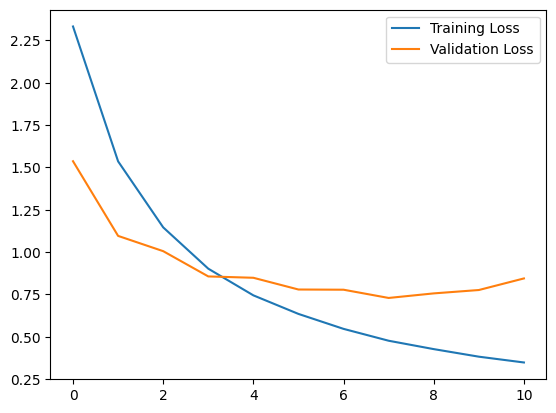

In [116]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

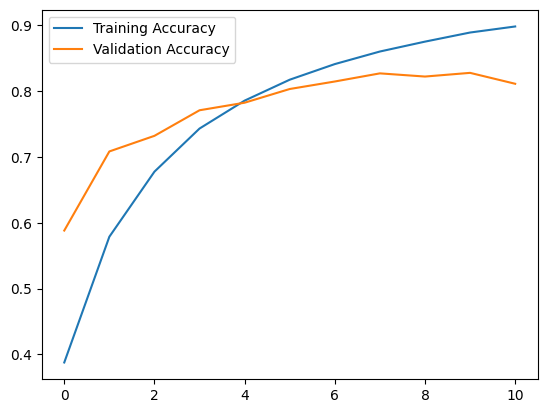

In [117]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()

In [ ]:
results = model.evaluate(test_images, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

c:\Users\windowadmin5.WIN-TAQQ3RO5V1L\Desktop\COA 9조\python-3.8.10-embed-amd64\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Test Accuracy: 82.19%


#### Save Model

In [114]:
model.save('../models/densenet.h5')